In [67]:
# The code was removed by Watson Studio for sharing.

In [2]:
body = client_2a6885dff7934b7ebca366177a8277d7.get_object(Bucket='pythonds-donotdelete-pr-nzk6zsmvpe2pao',Key='Divvy_Trips_2017_Q1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_Q1 = pd.read_csv(body) # import 2017 Q1 csv file

body = client_2a6885dff7934b7ebca366177a8277d7.get_object(Bucket='pythonds-donotdelete-pr-nzk6zsmvpe2pao',Key='Divvy_Trips_2017_Q2.csv')['Body']
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_Q2 = pd.read_csv(body) # import 2017 Q2 csv file

body = client_2a6885dff7934b7ebca366177a8277d7.get_object(Bucket='pythonds-donotdelete-pr-nzk6zsmvpe2pao',Key='Divvy_Trips_2017_Q3.csv')['Body']
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_Q3 = pd.read_csv(body) # import 2017 Q3 csv file

body = client_2a6885dff7934b7ebca366177a8277d7.get_object(Bucket='pythonds-donotdelete-pr-nzk6zsmvpe2pao',Key='Divvy_Trips_2017_Q4.csv')['Body']
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_Q4 = pd.read_csv(body) # import 2017 Q4 csv file

# concatenate imported DFs Q1~Q4 
df_2017 = pd.concat([df_Q1, df_Q2, df_Q3, df_Q4]) 

In [4]:
df_2017.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,13518905,3/31/2017 23:59:07,4/1/2017 00:13:24,5292,857,66,Clinton St & Lake St,171,May St & Cullerton St,Subscriber,Male,1989.0
1,13518904,3/31/2017 23:56:25,4/1/2017 00:00:21,4408,236,199,Wabash Ave & Grand Ave,26,McClurg Ct & Illinois St,Subscriber,Male,1990.0
2,13518903,3/31/2017 23:55:33,4/1/2017 00:01:21,696,348,520,Greenview Ave & Jarvis Ave,432,Clark St & Lunt Ave,Subscriber,Female,1979.0
3,13518902,3/31/2017 23:54:46,3/31/2017 23:59:34,4915,288,110,Dearborn St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1985.0
4,13518901,3/31/2017 23:53:33,4/1/2017 00:00:28,4247,415,327,Sheffield Ave & Webster Ave,331,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0


In [54]:
#counts Top 5 stations with the most starts 
top5 = df_2017['from_station_name'].value_counts()
top5 = pd.DataFrame(top5.head())
top5

,from_station_name
Streeter Dr & Grand Ave,97571
Lake Shore Dr & Monroe St,53400
Canal St & Adams St,50911
Clinton St & Washington Blvd,49832
Theater on the Lake,47908


In [55]:
#rename column
top5.rename(columns={'from_station_name':'Counts'}, inplace=True)
#transpose for visualization
top5.transpose()

In [65]:
top5.plot.barh()
plt.title('Top 5 stations with the most starts')
plt.xlabel('User count')
plt.ylabel('Station name')
plt.show()

NameError: name 'top5' is not defined

In [33]:
#check usertype value
df_2017['usertype'].unique()

array(['Subscriber', 'Customer', 'Dependent'], dtype=object)

In [36]:
df_subscriber = df_2017.loc[df_2017['usertype'] == 'Subscriber']
df_customer = df_2017.loc[df_2017['usertype'] == 'Customer']
df_dependent = df_2017.loc[df_2017['usertype'] == 'Dependent']

In [40]:
#making trip duration list for usertype:Subscriber
subscriber_trip = [
    df_2017.loc[df_2017['usertype'] == 'Subscriber'].trip_id.count(),#total trip counts
    df_2017.loc[df_2017['usertype'] == 'Subscriber'].tripduration.sum() / (60*60),#total hour
    df_2017.loc[df_2017['usertype'] == 'Subscriber'].tripduration.mean() / 60,#average trip minutes
    df_2017.loc[df_2017['usertype'] == 'Subscriber'].tripduration.median() / 60#trip minutes median
]
subscriber_trip

[2992135, 584952.10166666668, 11.729793642332314, 9.533333333333333]

In [41]:
#making trip duration list for usertype:Customer
customer_trip = [
    df_2017.loc[df_2017['usertype'] == 'Customer'].trip_id.count(),#total trip counts
    df_2017.loc[df_2017['usertype'] == 'Customer'].tripduration.sum() / (60*60),#total hour
    df_2017.loc[df_2017['usertype'] == 'Customer'].tripduration.mean() / 60,#average trip minutes
    df_2017.loc[df_2017['usertype'] == 'Customer'].tripduration.median() / 60#trip minutes median
]
customer_trip

[836872, 431472.94138888887, 30.934690709371726, 22.816666666666666]

In [42]:
#making trip duration list for usertype:Dependent
dependent_trip = [
    df_2017.loc[df_2017['usertype'] == 'Dependent'].trip_id.count(),#total trip counts
    df_2017.loc[df_2017['usertype'] == 'Dependent'].tripduration.sum() / (60*60),#total hour
    df_2017.loc[df_2017['usertype'] == 'Dependent'].tripduration.mean() / 60,#average trip minutes
    df_2017.loc[df_2017['usertype'] == 'Dependent'].tripduration.median() / 60#trip minutes median
]
dependent_trip

[7, 1.4619444444444445, 12.530952380952382, 13.4]

In [52]:
#create DataFrame from the lists
df_duration = pd.DataFrame(subscriber_trip)
df_duration['Customer'] = customer_trip
df_duration['Dependent'] = dependent_trip

In [61]:
#rename column and index
df_duration.columns=['Subscriber','Customer','Dependent']
df_duration.rename(index={0:'Trip Counts',1:'Total Hour',2:'Average minutes',3:'Median minutes'}, inplace=True)

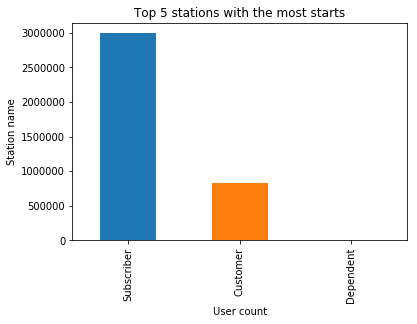

In [80]:
df_duration = df_duration.transpose()

df_duration['Trip Counts'].plot.bar()
plt.title('Total trip counts by user type')
plt.xlabel('User Type')
plt.ylabel('Trip Counts')
plt.show()

In [76]:
df_duration.index

Index(['Trip Counts', 'Total Hour', 'Average minutes', 'Median minutes'], dtype='object')